<a href="https://colab.research.google.com/github/shivani12696/Insurance-customer-profiling-and-hypothesis-testing-/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTIONS:
how these features influence insurance costs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1g50gpXOrA6b7J6iQVekb20jbCIEgyF5k

Downloading...
From: https://drive.google.com/uc?id=1g50gpXOrA6b7J6iQVekb20jbCIEgyF5k
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 64.7MB/s]


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [8]:
# let's check how many people are healthy (normal bmi)
df[(df['bmi'] >= 18.5) & (df['bmi'] < 24.9)]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


In [9]:
222 * 100/1338

16.591928251121075

222 people -> only 16.6% of the people recorded lies in healthy bmi range

We will now check for outliers-

In [10]:
# outliers in bmi column, through IQR method.
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

print(" Number of outliers-> ", len(outliers))
print("percentage of outliers-> ", len(outliers)*100 / df.shape[0])

 Number of outliers->  9
percentage of outliers->  0.672645739910314


In [11]:
# outliers in charges column, through IQR method.
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

print(" Number of outliers-> ", len(outliers))
print("percentage of outliers-> ", len(outliers)*100 / df.shape[0])

 Number of outliers->  139
percentage of outliers->  10.388639760837071


We will check for outliers through boxplot visualization

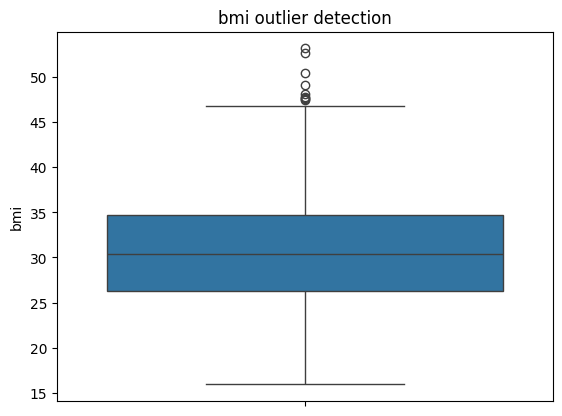

In [ ]:
sns.boxplot(data = df, y = 'bmi')
plt.title('bmi outlier detection')
plt.show()

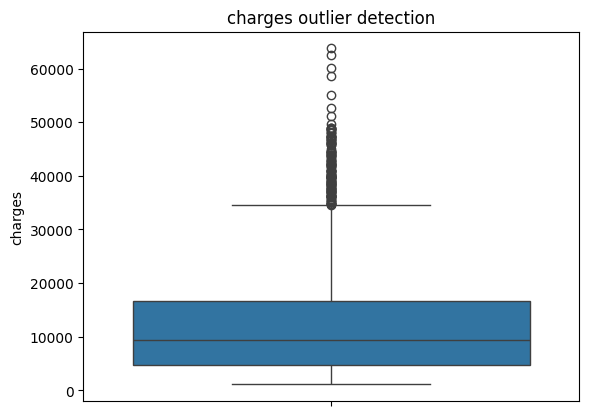

In [ ]:
sns.boxplot(data = df, y = 'charges')
plt.title('charges outlier detection')
plt.show()

Insights:
1. age column has no outliers.
2. bmi has 9 outliers, this may be due to errors in data entry (like 0 or 100+) or rare health conditions
3. charges has a large number of outliers — this often happens with cost-related data, which is typically right-skewed. A small number of patients with extremely high medical costs may drive up the outliers.

Handling outliers:
1. Since the outlier data is good for business perspective for the insurance company, it would be wise to keep the data for the targeted customers.
2. Since medical expenses are naturally right-skewed — a small number of patients account for very high costs, If removed those, it will hide reality.
3. Extreme values in insurance cost might also help in indicating fraudulent claims or over-utilization. hence it is wise to keep them for the company business.


In [ ]:
df['bmi category'] = pd.cut(df['bmi'], bins=[0, 25, 30, 35, 100],
                            labels=['Normal', 'Overweight', 'Obese I', 'Obese II+'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese I
2,28,male,33.000,3,no,southeast,4449.46200,Obese I
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Categorical Analysis:

In [ ]:

cat_cols = ['sex', 'children', 'smoker', 'region']
for i in cat_cols:
  print(df[i].value_counts()*100/1338)
  print()

sex
male      50.523169
female    49.476831
Name: count, dtype: float64

children
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: count, dtype: float64

smoker
no     79.521674
yes    20.478326
Name: count, dtype: float64

region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: count, dtype: float64



Insights:
1. almost equal number of male and female, with slightly more males
2. 42% people have no children
3. almost 80% are non smokers, but smokers may be driving high charges. risk adjusted pricing for smokers is essential.
4. fairly balanced regional spread, with slightly more customers in the southeast.

#BIVARIATE ANALYSIS:


In [ ]:
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi category,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,18-25
1,18,male,33.770,1,no,southeast,1725.55230,Obese I,18-25
2,28,male,33.000,3,no,southeast,4449.46200,Obese I,26-35
3,33,male,22.705,0,no,northwest,21984.47061,Normal,26-35
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-35


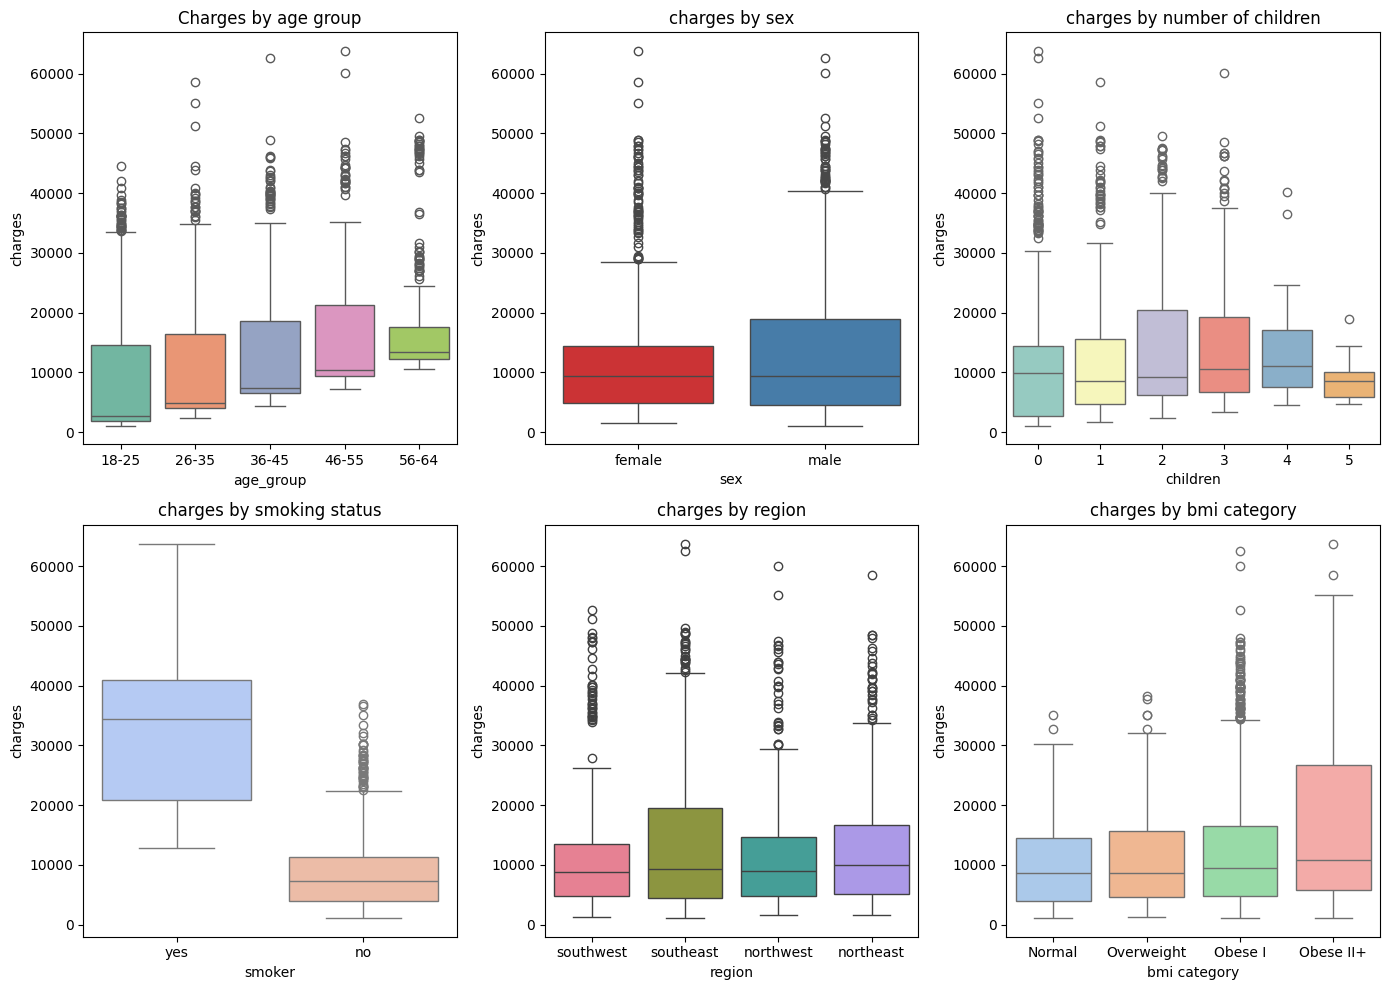

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (14, 10))

#charges by age
sns.boxplot(data = df, x = 'age_group', y = 'charges', hue = 'age_group', ax = axes[0, 0], palette= 'Set2', legend = False)
axes[0, 0].set_title('Charges by age group')

#charges by sex
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'sex', ax = axes[0, 1], palette= 'Set1', legend= False)
axes[0, 1].set_title('charges by sex')

#charges by number of children
sns.boxplot(data = df, x = 'children', y = 'charges', hue = 'children', ax = axes[0, 2], palette= 'Set3', legend = False)
axes[0, 2].set_title('charges by number of children')

#charges by smoking status
sns.boxplot(data = df, x = 'smoker', y = 'charges', hue = 'smoker', ax = axes[1, 0], palette= 'coolwarm', legend = False)
axes[1, 0].set_title('charges by smoking status')

#charges by region
sns.boxplot(data = df, x = 'region', y = 'charges', hue = 'region', ax = axes[1,1], palette= 'husl', legend= False)
axes[1,1].set_title('charges by region')

#charges by bmi category
sns.boxplot(data= df, x = 'bmi category', y = 'charges', hue= 'bmi category', ax= axes[1, 2], palette= 'pastel', legend= False)
axes[1, 2].set_title('charges by bmi category')

plt.tight_layout()
plt.show()

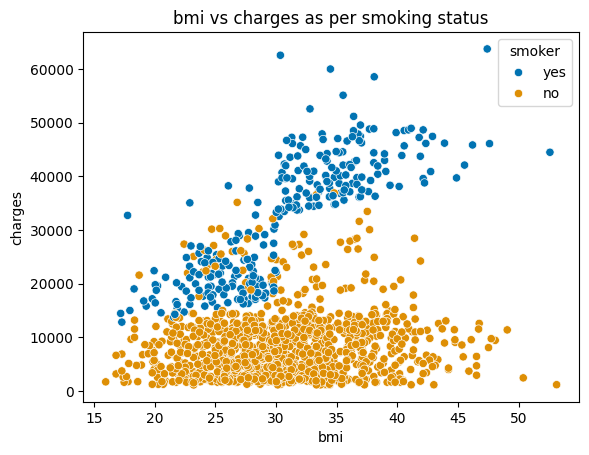

In [ ]:
# bmi vs charges as per smoking status
sns.scatterplot(data= df, x = 'bmi', y = 'charges', hue = 'smoker', palette = 'colorblind')
plt.title('bmi vs charges as per smoking status')
plt.show()

**Charges vs Age:**
  
  a. Each group has outliers shows that some individuals in each group have unusually high medical cost.
  
  b. Older groups (46–55, 56–64) have higher lower-quartile values — suggesting even the less expensive cases cost more.

Suggestions (Business perspective):
1. The risk of very high-cost claims exists across all age groups, but especially after age 35.
2. Since Older age groups (46–55, 56–64) consistently have higher costs.

  a. Create tiered premium plans by age bracket.
  
  b. Consider higher base premiums or more comprehensive plans for 45+.

3. Introduce Preventive Health Plans for Mid-Age Adults starting at age 36+

  a. Launch preventive care incentives (free checkups, fitness programs) for 36–45 age group.
  
  b. Focus on early detection to reduce future high-cost claims.

4. Every group has extreme-cost individuals, not just elderly, company can launch initiatives like 'Outlier-Aware Risk Pooling'.

5. Offer custom pricing for combinations. eg., bmi > 30 + smoker + age 45+ = very high risk group.
-------------------------


**Charges by sex**:

  a. Males have wider spread than women. it means male members have variable insurance cost than females.
  
  b. Female members have have narrow spread. It means their charges are more compact and closer to the median.

  c. Outliers exist in both females and male. which means high cost individual exist in both groups.

Suggestions (Business perspective):

  1. Since male tend to have higher and more variable cost than females, premium policy should be more gender-centric with certain age-risk brackets.

  2. For outlier centric population, consider using individual risk factors (BMI, smoker etc).
  -----------------------------------



**Charges vs number of children:**

a. children alone doesn't affect insurance charges.

b. Parents who have 0 or 1 children have lower charges.

c. 2 or 3 children parents have higher cost

d. whereas 4 or 5 children parents have lower charges and narrow spread. this may be due to less sample size or poor financial conditions, who can't afford the insurance cost.

Suggestions (Business perspective):
  
  1. People with 2 or 3 children can be targeted for family-focussed insurance plans.

  2. Offer bundled coverage for dependents, maternity, and pediatric services.

  3. People with larger family, 4 or 5 children, need not be charged. Child related claims can be considered separately.

  

 **Charges vs region:**

 a. There is no clear difference in charges in regions. However, southeast and northeast show wider boxplot than southwest and northwest. It means that southeast and northeast people have more variable insurance charges

 Suggestions(Business perspective):

  1. Policies in southeast region can be more robust as there is more variability and some people exist with higher medical expenses.
  
  2. Adjust base premiums for southeast to reflect the higher expected claim amounts.

  3. Introduce regional risk scoring in pricing models.



**Charges vs BMI:**

a. The median (hence, charges) rises with rise in bmi.

Correlation heatmap:

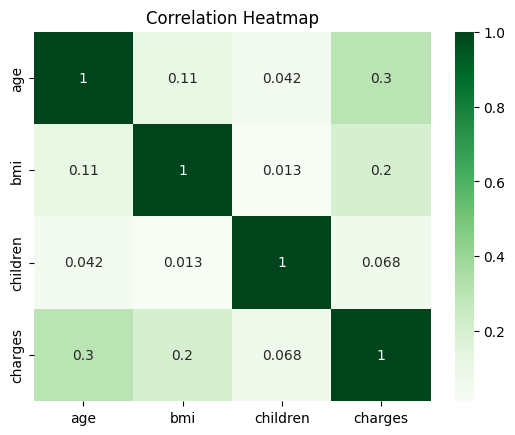

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlation Heatmap")
plt.show()

#Hypothesis testing:

Chi Squared test of independence: **Is smoking status independence of sex?**(Categorical vs categorical)

H₀: Smoking status and sex are independent (no relationship)

H₁: There is a relationship between sex and smoking

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sex'], df['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("p- value", p)
print("contingency table: ")
print(contingency_table)

p- value 0.006548143503580696
contingency table: 
smoker   no  yes
sex             
female  547  115
male    517  159


since p-value turns out to be 0.006 < 0.05. Hence with 95% confidence, we reject the null hypothesis. That is, there is a relationship between sex and smoking.
To find out the relationship between smoking and sex, we will find the % in the contingency table.

In [ ]:
pd.crosstab(df['sex'], df['smoker'], normalize='index') * 100

smoker,no,yes
sex,,
female,82.628399,17.371601
male,76.479290,23.520710


Hence, it was found out that males(23.5%) are more likely to be smokers than females(17.4%).

**Is BMI correlated with age?** (Numeric vs Numeric)
H0: No correlation between age and BMI

H₁: There is a correlation


In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['age'], df['bmi'])
print(p_value)

6.194289065049117e-05


Since pearson correlation value for BMI and age is 6.194289065049117e-05, i.e., 0.0000619 < 0.05, hence with 95% confidence we reject the Null hypothesis.
There is a statistically significant linear relationship between bmi and age.


In [ ]:
#Find the relationship  between BMI and age

from scipy.stats import pearsonr
r, p = pearsonr(df['age'], df['bmi'])
print("Correlation Coefficient:", r)

Correlation Coefficient: 0.10927188154853515


There is a very weak positive correlation between bmi and age.
As age increases, BMI very slightly increases — but the effect is minimal.
Let's see the relationship between them.

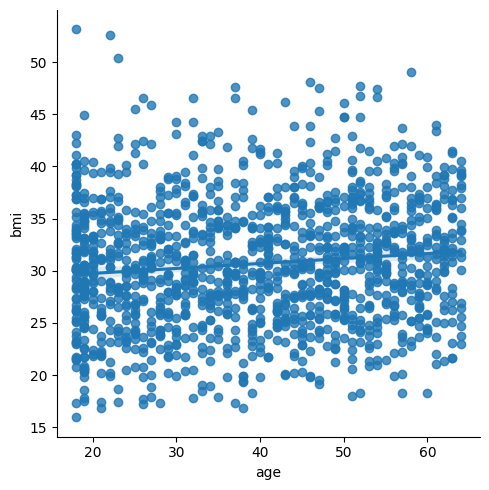

In [ ]:
sns.lmplot(x='age', y='bmi', data=df)

**Does BMI vary across regions?**
Test Type: One-way ANOVA (numeric vs categorical)

H₀: Mean BMI is the same across all regions

H₁: At least one region has different BMI


In [ ]:
from scipy.stats import f_oneway

groups = [df[df['region'] == r]['bmi'] for r in df['region'].unique()]
f_stat, p_value = f_oneway(*groups)
print(p_value)

1.881838913929143e-24


Hence we reject the Null Hypothesis. Hence, at least one region has different BMI.